#### check a relation between VIX & VVIX & S&P500
- get the price of S&P500, VIX, VVIX from yahoo finance
- look through the relation between these data

In [1]:
# execution environment
import platform
import sys
print(platform.platform())
print(sys.version)

Windows-10-10.0.18362-SP0
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [2]:
import datetime as dt
from tqdm.notebook import tqdm
import pandas as pd
import pandas_datareader.data as pdd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
#import pandas_datareader.data as pdd
#import datetime

start = dt.datetime(2007,1,3) # the starting day of VVIX
#end = dt.datetime(2013,1,31)
start_date_plot = dt.date(2019,1,1)

In [4]:
# stocks which you'd like to get the prices
vix = '^VIX'
vvix = '^VVIX'
gspc = '^GSPC' # S&P500
stock_lst = [vix, vvix, gspc]

In [5]:
# get a stock price from yahoo finance
# designate a symbol of https://finance.yahoo.com/lookup

data = pdd.get_data_yahoo(stock_lst, start)['Adj Close']
#data = pdd.get_data_yahoo(stock_lst, start, end)['Adj Close']

In [6]:
# look through the dataset
data

Symbols,^VIX,^VVIX,^GSPC
Date,,,
2007-01-03,12.040000,87.629997,1416.599976
2007-01-04,11.510000,88.190002,1418.339966
2007-01-05,12.140000,90.169998,1409.709961
2007-01-08,12.000000,92.040001,1412.839966
2007-01-09,11.910000,92.760002,1412.109985
...,...,...,...
2020-11-20,23.700001,113.989998,3557.540039
2020-11-23,22.660000,109.849998,3577.590088
2020-11-24,21.639999,104.559998,3635.409912


In [7]:
data.index

DatetimeIndex(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
               '2007-01-09', '2007-01-10', '2007-01-11', '2007-01-12',
               '2007-01-16', '2007-01-17',
               ...
               '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-27'],
              dtype='datetime64[ns]', name='Date', length=3502, freq=None)

In [8]:
data[1:1+1].index

DatetimeIndex(['2007-01-04'], dtype='datetime64[ns]', name='Date', freq=None)

In [9]:
# get a correlation coefficients
def add_corr(df, start_date, var1, var2, period=10):
    # extract by date
    #start_index = min(df[df['Date']>=str(start_date)].index)
    start_index = min(df[df.index>=str(start_date)].index)
    df = df[df.index>=start_index]
    max_index = max(df.index)
    
    corr_list = []
    
    #for i in tqdm(range(start_index, max_index+1)):
    for i, idx in tqdm(enumerate(df.index)):
        if i <= period:
            corr_list.append(None)
        else:
            j = i - period
            idx_lower = df[j:j+1].index[0] # data of index number 'i'
            tmp_df = df[(df.index>idx_lower) & (df.index<=idx)]
            tmp_df = tmp_df.corr()
            corr = tmp_df.loc[[var1],[var2]]
            corr_list.append(corr.iloc[0,0])
        
    corr_df = df[df.index>=start_index].copy()
    corr_df['corr'] = corr_list

    return corr_df

In [10]:
corr_df = add_corr(data, start_date_plot, vix, vvix, period=20)

In [11]:
corr_df

Symbols,^VIX,^VVIX,^GSPC,corr
Date,,,,
2019-01-02,23.219999,81.660004,2510.030029,NaN
2019-01-03,25.450001,83.800003,2447.889893,NaN
2019-01-04,21.379999,84.440002,2531.939941,NaN
2019-01-07,21.400000,82.739998,2549.689941,NaN
2019-01-08,20.469999,82.410004,2574.409912,NaN
...,...,...,...,...
2020-11-20,23.700001,113.989998,3557.540039,0.974254
2020-11-23,22.660000,109.849998,3577.590088,0.974199
2020-11-24,21.639999,104.559998,3635.409912,0.971332


In [12]:
def plot_df(df, start_date=None, \
            y1='sp500', y2='vix', \
            y1label='S&P500', y2label='vix', title=None):
    # extract by date
    if not(start_date==None):
        df = df[df.index>=str(start_date)]
    
    fig = plt.figure(figsize=(12, 8))
    # left axis
    ax1 = fig.add_subplot(111)
    ax1.plot(df.index,df[y1],color='red')
    # right axis
    ax2 = ax1.twinx()
    ax2.plot(df.index,df[y2],color='blue')
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d'))
    
    ax1.grid()
    ax1.set_ylabel(y1label, color='red')
    ax2.set_ylabel(y2label, color='blue')
    
    plt.title(title)
    plt.show()

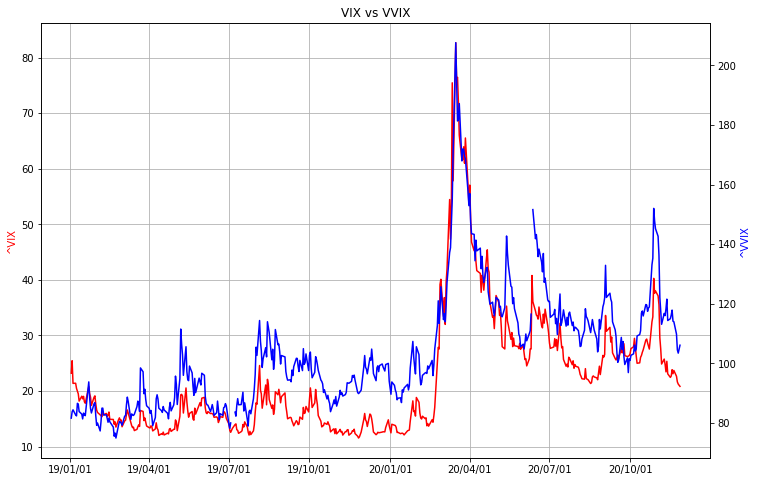

In [13]:
y1,y2 = vix, vvix
plot_df(corr_df, start_date_plot, y1=y1, y2=y2, y1label=y1, y2label=y2, title='VIX vs VVIX')
#plot_df(df, start_date=dt.date(2020,1,1), x1='sp500', x2='vix', x1label='S&P500', x2label='vix')

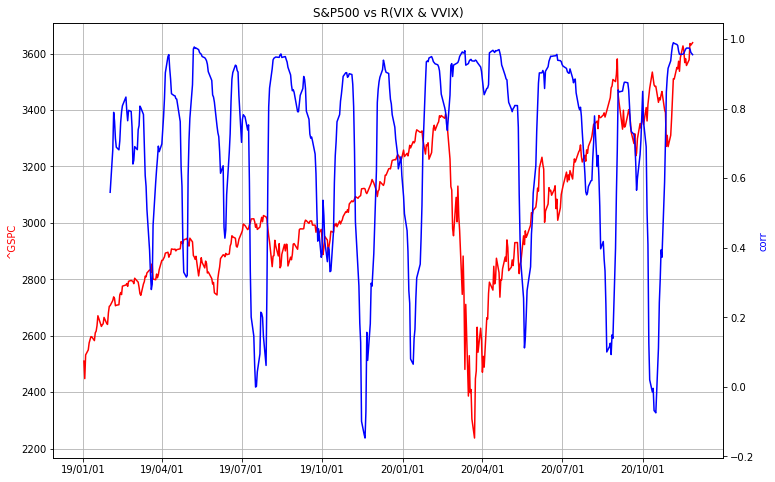

In [14]:
y1,y2 = gspc, 'corr'
plot_df(corr_df, start_date_plot, y1=y1, y2=y2, y1label=y1, y2label=y2, title='S&P500 vs R(VIX & VVIX)')

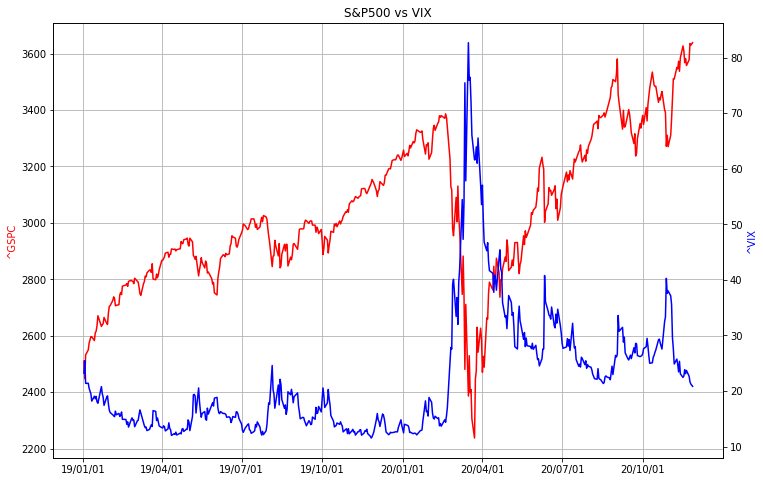

In [15]:
y1,y2 = gspc, vix
plot_df(corr_df, start_date_plot, y1=y1, y2=y2, y1label=y1, y2label=y2, title='S&P500 vs VIX')

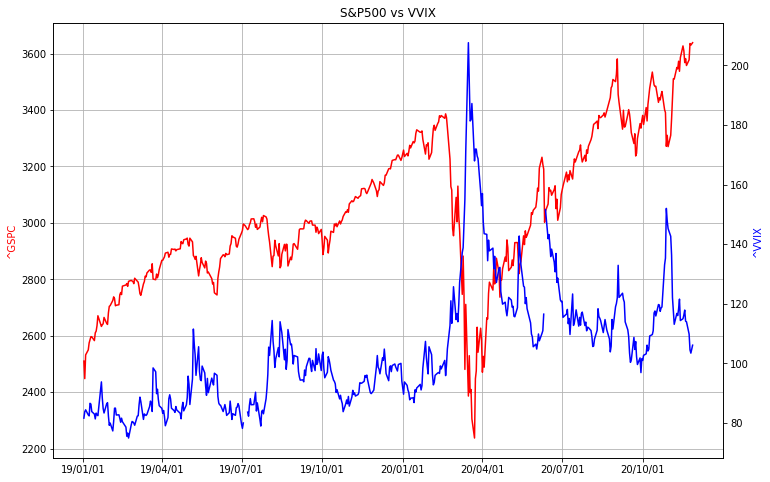

In [16]:
y1,y2 = gspc, vvix
plot_df(corr_df, start_date_plot, y1=y1, y2=y2, y1label=y1, y2label=y2, title='S&P500 vs VVIX')